##Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

##Read Image &  Resize

##Threshold Function

In [2]:
def thresholding(image):
    blurred_img = cv2.GaussianBlur(image.copy(), (17, 17), 0)
    gray_img = cv2.cvtColor(blurred_img, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding
    threshold_value = 255
    max_binary_value = cv2.THRESH_BINARY_INV
    threshold_type = cv2.ADAPTIVE_THRESH_GAUSSIAN_C
    block_size = 11
    constant = 2
    thresh_img = cv2.adaptiveThreshold(gray_img, threshold_value, threshold_type, max_binary_value, block_size, constant)

    # Display the thresholded image
    plt.imshow(thresh_img, cmap='gray')

    return thresh_img


##Remove Header And Footer Function

In [3]:
def remove_header_footer(image):
    # Thresholding
    thresh_img = thresholding(image)

    # Find and Sort Contours for the full image
    contours, hierarchy = cv2.findContours(thresh_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[1])  # Sort vertically

    # Specific cutting contours
    img_width = image.shape[1]  # Width of the image
    contours_for_cut = []
    for ctr in sorted_contours:
        x, y, w, h = cv2.boundingRect(ctr)
        if w > (img_width * 0.80):
            contours_for_cut.append((x, y, w, h))

    # Crop contours from image
    cropped_img = image.copy()
    if len(contours_for_cut) > 1:
        x = 0
        w = cropped_img.shape[1]

        # Remove header
        h = cropped_img.shape[0]
        header_y = contours_for_cut[0][1]
        header_h = contours_for_cut[0][3]
        header = header_y + header_h
        y = header
        cropped_img = cropped_img[y:h, x:w]

        # Remove footer
        new_y = 0
        h_without_header = cropped_img.shape[0]
        footer_y = contours_for_cut[-1][1]
        footer_h = contours_for_cut[-1][3]
        footer = h - footer_y
        new_h = h_without_header - footer
        cropped_img = cropped_img[new_y:new_h, x:w]

        plt.imshow(cropped_img)

    return cropped_img


##remove header and footer

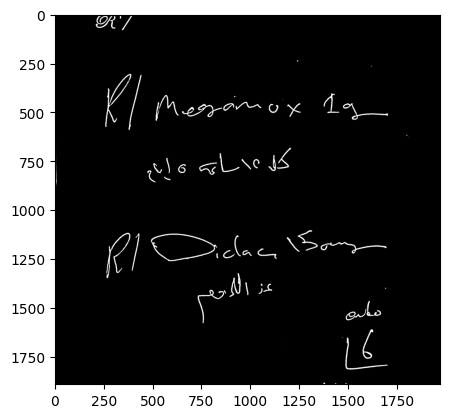

In [ ]:
# cutted_img = remove_header_footer(original_img)
# thresh_img = thresholding(cutted_img)

##Mean Hight Of Lines function

In [4]:
def mean_height_of_lines(sorted_contours_lines):
    sum_of_heights = 0
    for ctr in sorted_contours_lines:
        x, y, w, h = ctr
        sum_of_heights += h
    mean_of_heights = sum_of_heights / len(sorted_contours_lines)
    return mean_of_heights


##Mean Space Between Lines function

In [5]:
def mean_space_between_lines(sorted_contours_lines):
    sum_of_spaces = 0
    i = 1
    for ctr in sorted_contours_lines:
        if i < len(sorted_contours_lines):
            x, y, w, h = ctr
            nx, ny, nw, nh = sorted_contours_lines[i]
            sum_of_spaces += ny - (y + h)
            i += 1
    mean_of_spaces = sum_of_spaces / (len(sorted_contours_lines) - 1)
    return mean_of_spaces


##Contours to (x, y, w, h) function

In [6]:
def contours_to_xywh(sorted_contours_lines_N):
  sorted_contours_lines = []
  for ctr in sorted_contours_lines_N:
    x,y,w,h = cv2.boundingRect(ctr)
    sorted_contours_lines.append((x,y,w,h))
  print(sorted_contours_lines)
  return(sorted_contours_lines)

##remove noise function

In [7]:
def remove_noise(img4, sorted_contours_lines, mean_of_heights):
  sorted_contours_lines_mean = []
  for ctr in sorted_contours_lines:
    x,y,w,h = ctr
    if(h < int(mean_of_heights/2)):
        continue
    cv2.rectangle(img4, (x,y), (x+w, y+h), (np.random.randint(255),np.random.randint(255),np.random.randint(255)), 5) #img, coordnate, area, color, bold
    sorted_contours_lines_mean.append((x,y,w,h))
  return sorted_contours_lines_mean

##get contours of line segmentation function

In [8]:
def get_contours_line_segmentation(thresh_img):
    #line delation
  kernel = np.ones((5,200), np.uint8) #matrix of ones on shape 3*85 in dataType unsigned int
  dilated = cv2.dilate(thresh_img, kernel, iterations = 1) #iteration is num of steps of kernal
  # plt.imshow(dilated, cmap='gray')

  #get contours
  (contours, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  sorted_contours_lines_N = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[1]) # (x, y, w, h) #1 mean sort vertically but 0 mean sort horizontally

  sorted_contours_lines = contours_to_xywh(sorted_contours_lines_N)

  return sorted_contours_lines

##Line segmentation function

In [9]:
def line_segmentation(thresh_img, cutted_img):

  sorted_contours_lines = get_contours_line_segmentation(thresh_img)
  #First Calling Of Mean Hight & Mean Space**(Before Delete Noise)
  mean_of_heights = mean_height_of_lines(sorted_contours_lines)
  mean_of_spaces = mean_space_between_lines(sorted_contours_lines)
  print(mean_of_heights)
  print(mean_of_spaces)


  #remove noise and drow line segmentation on cutted_img
  sorted_contours_lines_mean = remove_noise(cutted_img, sorted_contours_lines, mean_of_heights)
  plt.imshow(cutted_img);

  return sorted_contours_lines_mean

##Drow line segmentation

[(109, 0, 391, 85), (1137, 234, 211, 12), (1515, 262, 205, 9), (157, 304, 1645, 291), (815, 417, 214, 11), (1064, 433, 203, 6), (0, 528, 108, 454), (1696, 615, 205, 10), (1708, 626, 203, 7), (372, 682, 934, 181), (164, 1104, 1630, 249), (630, 1323, 579, 261), (1587, 1397, 205, 11), (1386, 1465, 380, 104), (0, 1556, 102, 10), (0, 1567, 102, 6), (0, 1575, 103, 42), (1369, 1609, 431, 211), (1057, 1683, 200, 6), (1271, 1883, 319, 9)]
98.75
-4.368421052631579
229.5
-2.2857142857142856


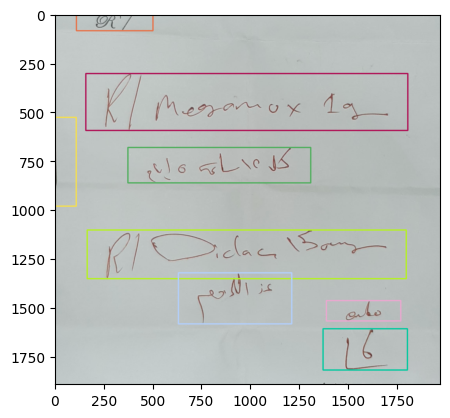

In [ ]:
# sorted_contours_lines_mean = line_segmentation(thresh_img.copy(), cutted_img.copy())
# #calc mean height and mean spaces after remove noise and line segmentation
# mean_of_heights = mean_height_of_lines(sorted_contours_lines_mean)
# mean_of_spaces = mean_space_between_lines(sorted_contours_lines_mean)
# print(mean_of_heights)
# print(mean_of_spaces)

##space between word function

In [10]:
def spaceBetweenWords(word1, word2):
  x, y, w, h = cv2.boundingRect(word1)
  x2, y2, w2, h2 = cv2.boundingRect(word2)
  space=x2-(w+x)
  print(f"x1 {x} x2 {x2}")
  return space

##average  x function

In [11]:
def average_x(sorted_contours_lines_mean):
  avgX = 0
  sumX = 0
  for line in sorted_contours_lines_mean:
    sumX += line[0]
    print(f"{line}  {sumX}")
  avgX = sumX/len(sorted_contours_lines_mean)
  print(avgX *1.4)
  return avgX

##Word segmentation function

In [17]:
def word_segmentation(thresh_img, cutted_img, sorted_contours_lines_mean):
  kernel = np.ones((1,16), np.uint8)
  dilated2 = cv2.dilate(thresh_img, kernel, iterations = 4)
  plt.imshow(dilated2, cmap='gray');
  img3 =cutted_img.copy()
  img4 = cutted_img.copy()
  # words_list = []
  ln=0
  FistWordList = []
  FR=0
  avgX = average_x(sorted_contours_lines_mean)
  for line in sorted_contours_lines_mean:
    sorted_contour_words = []
    if line[0] > (avgX*0.5) :#line[0]=x #if exist more than word in exact line  لو الاكس كبيره يبقي السطر بادئ مش من اول السطر فمش عايزه
      continue
    FirstWordInLine=0

    x, y, w, h = line

    roi_line = dilated2[y:h+y, x:w+x]

    # draw contours on each word
    (cnt, heirarchy) = cv2.findContours(roi_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contour_words_beforeFilter = sorted(cnt, key=lambda cntr : cv2.boundingRect(cntr)[0])#0 mean sort horizontally but 1 mean sort vertically

    for word in sorted_contour_words_beforeFilter:
        if cv2.contourArea(word) < 400:
            continue
        sorted_contour_words.append(word)

    for word in sorted_contour_words:

        if FR==0 :
          firstR = word
          FR=1
        if (ln >= 0) and (FirstWordInLine == 0) and len(sorted_contour_words)>1:
            spaceBetweenWord=spaceBetweenWords(sorted_contour_words[0], sorted_contour_words[1])
            FistWordList.append(((x, y), word, spaceBetweenWord))
            FirstWordInLine = 1


        x2, y2, w2, h2 = cv2.boundingRect(word)
        # words_list.append([x+x2, y+y2, x+x2+w2, y+y2+h2])
        cv2.rectangle(img3, (x+x2, y+y2), (x+x2+w2, y+y2+h2), (np.random.randint(255),np.random.randint(255),np.random.randint(255)),6)
    ln+=1

  plt.imshow(img3)

  contours_R = []

  AreaR1 = cv2.contourArea(FistWordList[0][1]) #FistWordList[num of word][contours of word]##contour of first word in list

  if(AreaR1 < (cv2.contourArea(firstR)*3)) :
    for word in FistWordList:
      ##word -> word[0]= contours of line, word[1]=contour of word in the line, word[2]= space between first & second
      print(cv2.contourArea(word[1])) #word[1]=contour of word
      if (cv2.contourArea(word[1]) < (AreaR1+(AreaR1*1.5))  ):
        x2, y2, w2, h2 = cv2.boundingRect(word[1])
        #word is (x, y), word----->(x, y) of line of word ,,, word is contour of words
        #word[1] = contour of word
        #word[0][0] = x of line,,,,word[0][1] = y of line
        cv2.rectangle(img4, (word[0][0]+x2, word[0][1]+y2), (word[0][0]+x2+w2, word[0][1]+y2+h2), (np.random.randint(255),np.random.randint(255),np.random.randint(255)),6)
        contours_R.append((word[0][0]+x2, word[0][1]+y2, w2, h2))

  plt.imshow(img4);
  return contours_R

##Drow word segmentation

(109, 0, 391, 85)  109
(157, 304, 1645, 291)  266
(0, 528, 108, 454)  266
(372, 682, 934, 181)  638
(164, 1104, 1630, 249)  802
(630, 1323, 579, 261)  1432
(1386, 1465, 380, 104)  2818
(1369, 1609, 431, 211)  4187
732.7249999999999
x1 71 x2 329
x1 71 x2 298
43781.5
39070.5


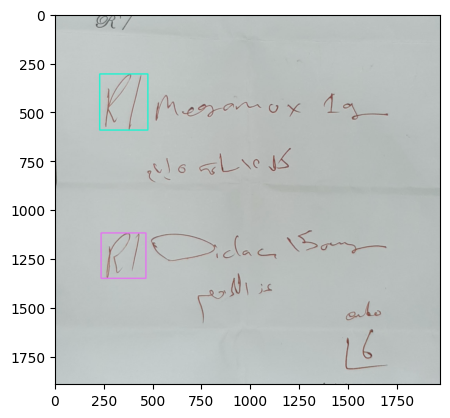

In [ ]:
# contours_R = word_segmentation(thresh_img.copy(), cutted_img.copy(), sorted_contours_lines_mean)

##mean start R\

In [14]:
def avgRR(contors):
  avgR = 0
  sumR = 0
  for R in contors:
    sumR += (R[0] + R[2]) #x+w
    # print(f"{line}  {sumR}")
  avgR = sumR/len(contors)
  print(avgR)
  return avgR

##Remove R\

In [15]:
def remove_R(imgR, contours_R):
  avgR = avgRR(contours_R)
  x, y, w, h = contours_R[0]
  # if( (x+w) < avgR):
  # cv2.rectangle(imgR, (x, y), (x+w, y+h), (np.random.randint(255),np.random.randint(255),np.random.randint(255)),9)
  n_y=0
  n_h=imgR.shape[0]
  n_x=int(avgR)
  n_w = imgR.shape[1]
  im = imgR[n_y:n_h, n_x:n_w]

  plt.imshow(im);
  return im

469.0


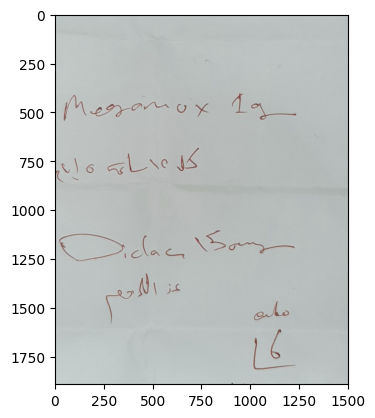

In [ ]:
# im = remove_R(cutted_img.copy(), contours_R)

##Word detection after remove R\

In [16]:
def final_word_detection(im):
  thresh_img = thresholding(im)
  kernel = np.ones((1,60), np.uint8)
  dilated5 = cv2.dilate(thresh_img, kernel, iterations = 1)
  plt.imshow(dilated5, cmap='gray');

  (contours, heirarchy) = cv2.findContours(dilated5.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  sorted_contours_Word_N = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[1]) # (x, y, w, h) #1 mean sort vertically but 0 mean sort horizontally
  # print(sorted_contours_lines_N[0].shape)

  sorted_contours_Words = []
  for ctr in sorted_contours_Word_N:
    x,y,w,h = cv2.boundingRect(ctr)
    sorted_contours_Words.append((x,y,w,h))

  img4 = im.copy()
  sorted_contours_Words_mean = []
  for ctr in sorted_contours_Words:

    #ctr= sorted_contours_lines[4]
    x,y,w,h = ctr
    if (w * h) < 2000:
      continue

    cv2.rectangle(img4, (x,y), (x+w, y+h), (np.random.randint(255),np.random.randint(255),np.random.randint(255)), 5) #img, coordnate, area, color, bold
    sorted_contours_Words_mean.append((x,y,w,h))
  plt.imshow(img4);
  return sorted_contours_Words_mean

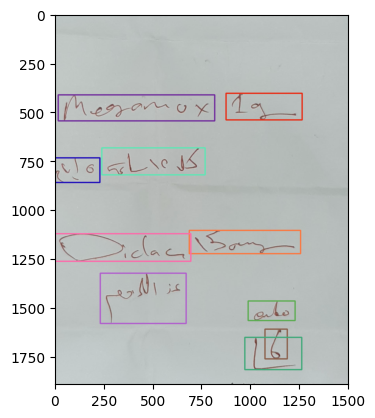

In [ ]:
# sorted_contours_Words_mean = final_word_detection(im.copy())

##PRINT WORD

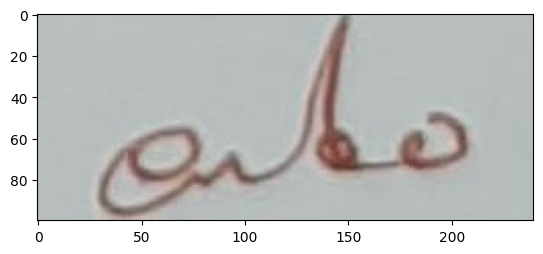

In [ ]:


# img3 = im.copy()
# LineNum=7
# x, y, w, h = sorted_contours_Words_mean[LineNum]
# #x=sorted_contours_lines_norm[LineNum][0]
# #y=sorted_contours_lines_norm[LineNum][1]
# #w=sorted_contours_lines_norm[LineNum][2]
# #h=sorted_contours_lines_norm[LineNum][3]
# plt.imshow(img3[y:y+h, x:x+w])


##crop image

In [ ]:
# crop_img = im.copy()
# i=0
# %rm -rf /content/Words
# os.mkdir('/content/Words')
# for ctr in sorted_contours_Words_mean:

#     x,y,w,h = ctr
#     #x,y,w,h = cv2.boundingRect(ctr)
#     word = crop_img[y:h+y, x:w+x]
#     print(str(x) + " " + str(y) +" "+str(w) +" "+str(h))
#     cv2.imwrite(f"/content/Words/Word_{i}.jpg", word)
#     i+=1


874 405 389 136
16 413 800 133
239 684 528 138
0 735 229 126
686 1106 569 119
0 1123 694 141
231 1325 439 257
987 1467 240 100
1073 1611 114 152
970 1653 291 165


In [ ]:
# %rm -rf /content/Words.zip
# !zip -r /content/Words.zip /content/Words/ #path+name  #path⅖

  adding: content/Words/ (stored 0%)
  adding: content/Words/Word_0.jpg (deflated 3%)
  adding: content/Words/Word_2.jpg (deflated 3%)
  adding: content/Words/Word_9.jpg (deflated 2%)
  adding: content/Words/Word_8.jpg (deflated 4%)
  adding: content/Words/Word_1.jpg (deflated 1%)
  adding: content/Words/Word_6.jpg (deflated 5%)
  adding: content/Words/Word_3.jpg (deflated 4%)
  adding: content/Words/Word_5.jpg (deflated 1%)
  adding: content/Words/Word_4.jpg (deflated 2%)
  adding: content/Words/Word_7.jpg (deflated 3%)


In [18]:
def run(original_img):
  cutted_img = remove_header_footer(original_img)
  thresh_img = thresholding(cutted_img)

  sorted_contours_lines_mean = line_segmentation(thresh_img.copy(), cutted_img.copy())
  #calc mean height and mean spaces after remove noise and line segmentation
  mean_of_heights = mean_height_of_lines(sorted_contours_lines_mean)
  mean_of_spaces = mean_space_between_lines(sorted_contours_lines_mean)

  contours_R = word_segmentation(thresh_img.copy(), cutted_img.copy(), sorted_contours_lines_mean)

  im = remove_R(cutted_img.copy(), contours_R)

  sorted_contours_Words_mean = final_word_detection(im.copy())


  crop_img = im.copy()
  i=0
  %rm -rf /content/Words
  os.mkdir('/content/Words')
  for ctr in sorted_contours_Words_mean:

    x,y,w,h = ctr
    #x,y,w,h = cv2.boundingRect(ctr)
    word = crop_img[y:h+y, x:w+x]
    print(str(x) + " " + str(y) +" "+str(w) +" "+str(h))
    cv2.imwrite(f"/content/Words/Word_{i}.jpg", word)
    i+=1


[(109, 0, 391, 85), (1137, 234, 211, 12), (1515, 262, 205, 9), (157, 304, 1645, 291), (815, 417, 214, 11), (1064, 433, 203, 6), (0, 528, 108, 454), (1696, 615, 205, 10), (1708, 626, 203, 7), (372, 682, 934, 181), (164, 1104, 1630, 249), (630, 1323, 579, 261), (1587, 1397, 205, 11), (1386, 1465, 380, 104), (0, 1556, 102, 10), (0, 1567, 102, 6), (0, 1575, 103, 42), (1369, 1609, 431, 211), (1057, 1683, 200, 6), (1271, 1883, 319, 9)]
98.75
-4.368421052631579
(109, 0, 391, 85)  109
(157, 304, 1645, 291)  266
(0, 528, 108, 454)  266
(372, 682, 934, 181)  638
(164, 1104, 1630, 249)  802
(630, 1323, 579, 261)  1432
(1386, 1465, 380, 104)  2818
(1369, 1609, 431, 211)  4187
732.7249999999999
x1 71 x2 329
x1 71 x2 298
43781.5
39070.5
469.0
874 405 389 136
16 413 800 133
239 684 528 138
0 735 229 126
686 1106 569 119
0 1123 694 141
231 1325 439 257
987 1467 240 100
1073 1611 114 152
970 1653 291 165


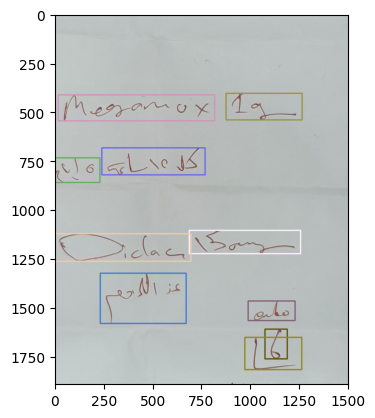

In [19]:
original_img = cv2.imread('/content/1.jpg', cv2.IMREAD_COLOR)
run(original_img)
